In [2]:
import pandas as pd

import numpy as np 

1️⃣ Read data from the CSV file into a Pandas DataFrame.

In [3]:
df=pd.read_csv("employees.csv")

df

,ID,Name,Department,Salary,Experience,Remote,Performance_Score
0,101,Ali,IT,5000.0,5.0,1.0,8.0
1,102,Sara,HR,4500.0,3.0,NaN,7.0
2,103,Omar,IT,5200.0,NaN,1.0,9.0
3,104,Lina,Marketing,4300.0,4.0,0.0,6.0
4,105,Ahmed,IT,NaN,7.0,1.0,9.0
5,106,Khaled,HR,4000.0,2.0,0.0,NaN
6,107,Mariam,Marketing,4700.0,3.0,1.0,8.0


2️⃣ Fill missing values:

Fill missing Salary and Experience values with their column mean.

Drop rows where Performance_Score is missing.

In [7]:
df["Salary"]=df["Salary"].fillna(df["Salary"].mean())

df["Salary"]=np.round(df["Salary"],2)

df["Experience"]=df["Experience"].fillna(df["Experience"].mean())

df.dropna(subset=["Performance_Score"],inplace=True)

df

,ID,Name,Department,Salary,Experience,Remote,Performance_Score
0,101,Ali,IT,5000.00,5.0,1.0,8.0
1,102,Sara,HR,4500.00,3.0,NaN,7.0
2,103,Omar,IT,5200.00,4.0,1.0,9.0
3,104,Lina,Marketing,4300.00,4.0,0.0,6.0
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0
6,107,Mariam,Marketing,4700.00,3.0,1.0,8.0


3️⃣ Rename columns:
Salary → Monthly_Salary

Experience → Years_of_Experience

Remote → Works_Remotely

In [9]:
df.rename(columns={
    "Salary":"Monthly_Salary",
    "Experience":"Years_of_Experience",
    "Remote":"Works_Remotely"
    
},inplace=True)

df

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score
0,101,Ali,IT,5000.00,5.0,1.0,8.0
1,102,Sara,HR,4500.00,3.0,NaN,7.0
2,103,Omar,IT,5200.00,4.0,1.0,9.0
3,104,Lina,Marketing,4300.00,4.0,0.0,6.0
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0
6,107,Mariam,Marketing,4700.00,3.0,1.0,8.0


4️⃣
Find employees in IT OR HR departments.

Find employees who DO NOT work remotely.

In [14]:
it_hr=df[(df["Department"]=="IT") | (df["Department"]=="HR")]


it_hr

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score
0,101,Ali,IT,5000.00,5.0,1.0,8.0
1,102,Sara,HR,4500.00,3.0,NaN,7.0
2,103,Omar,IT,5200.00,4.0,1.0,9.0
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0


In [16]:
# Employees who DO NOT work remotely
not_remote = df[~(df["Works_Remotely"] == 1)]

not_remote

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score
1,102,Sara,HR,4500.0,3.0,NaN,7.0
3,104,Lina,Marketing,4300.0,4.0,0.0,6.0


In [21]:
highest_salary=df.loc[df["Monthly_Salary"].idxmax()]

highest_salary

ID                        103
Name                     Omar
Department                 IT
Monthly_Salary         5200.0
Years_of_Experience       4.0
Works_Remotely            1.0
Performance_Score         9.0
Name: 2, dtype: object

In [22]:
df["Annual_Salary"] = df["Monthly_Salary"] * 12

In [23]:
df

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score,Annual_Salary
0,101,Ali,IT,5000.00,5.0,1.0,8.0,60000.00
1,102,Sara,HR,4500.00,3.0,NaN,7.0,54000.00
2,103,Omar,IT,5200.00,4.0,1.0,9.0,62400.00
3,104,Lina,Marketing,4300.00,4.0,0.0,6.0,51600.00
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0,55400.04
6,107,Mariam,Marketing,4700.00,3.0,1.0,8.0,56400.00


In [24]:
average_performance_by_department = df.groupby("Department")["Performance_Score"].mean()
print("\nAverage Performance Score by Department:\n", average_performance_by_department)



Average Performance Score by Department:
 Department
HR           7.000000
IT           8.666667
Marketing    7.000000
Name: Performance_Score, dtype: float64


In [25]:
df_sorted_by_experience=df.sort_values(by="Performance_Score",ascending=False)

df_sorted_by_experience

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score,Annual_Salary
2,103,Omar,IT,5200.00,4.0,1.0,9.0,62400.00
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0,55400.04
0,101,Ali,IT,5000.00,5.0,1.0,8.0,60000.00
6,107,Mariam,Marketing,4700.00,3.0,1.0,8.0,56400.00
1,102,Sara,HR,4500.00,3.0,NaN,7.0,54000.00
3,104,Lina,Marketing,4300.00,4.0,0.0,6.0,51600.00


🚀 Challenge Yourself!
Find the employee with the lowest performance score.

Filter employees who have more than 5 years of experience and work remotely.

Create a bar chart showing the average salary per department using Matplotlib or Seaborn.

In [26]:

lowest_performance=df.loc[df["Performance_Score"].min()]

lowest_performance

ID                           107
Name                      Mariam
Department             Marketing
Monthly_Salary            4700.0
Years_of_Experience          3.0
Works_Remotely               1.0
Performance_Score            8.0
Annual_Salary            56400.0
Name: 6, dtype: object

In [30]:
experience_employees=df[(df["Years_of_Experience"]>5) & (df["Works_Remotely"]==1)]


experience_employees

,ID,Name,Department,Monthly_Salary,Years_of_Experience,Works_Remotely,Performance_Score,Annual_Salary
4,105,Ahmed,IT,4616.67,7.0,1.0,9.0,55400.04


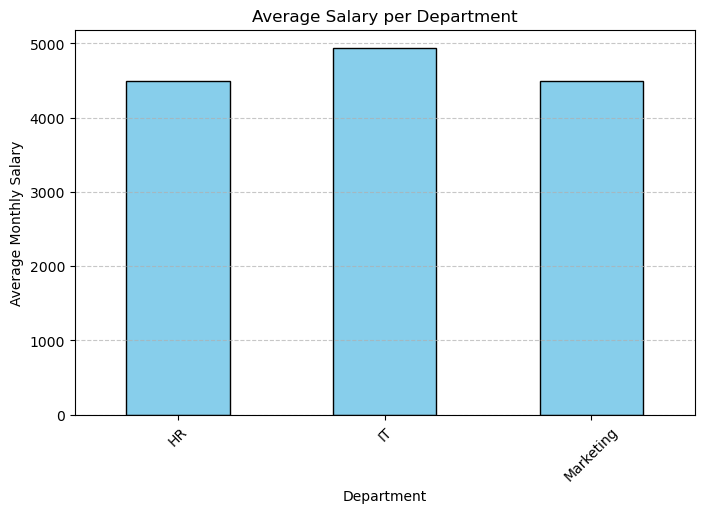

In [31]:
import matplotlib.pyplot as plt

# Calculate average salary per department
avg_salary_per_department = df.groupby("Department")["Monthly_Salary"].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
avg_salary_per_department.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Department")
plt.ylabel("Average Monthly Salary")
plt.title("Average Salary per Department")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [32]:
avg_salary_per_department


Department
HR           4500.00
IT           4938.89
Marketing    4500.00
Name: Monthly_Salary, dtype: float64